In [ ]:
#!pip install transformers 

# Data Processing
import pandas as pd
import numpy as np
import pickle
import joblib

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_ami_train = pd.read_csv('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/ami_data/ami_train.csv')
df_ami_test = pd.read_csv('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/ami_data/ami_test.csv')

In [ ]:
df_reddit_train = pd.read_csv('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/reddit_data/train_reddit.csv')
df_reddit_test = pd.read_csv('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/reddit_data/test_reddit.csv')

In [ ]:
import json
tokens_to_text=[]
for i,j in df_ami_train.iterrows():
  #f=json.loads(j['tokenised_text'])
  s = ' '.join(eval(j['tokenised_text']))
  tokens_to_text.append(s)

In [ ]:
df_ami_train['clean_text']=tokens_to_text

In [ ]:
tokens_to_text2=[]
for i,j in df_ami_test.iterrows():
  #f=json.loads(j['tokenised_text'])
  s = ' '.join(eval(j['tokenised_text']))
  tokens_to_text2.append(s)

In [ ]:
df_ami_test['clean_text']=tokens_to_text2

In [ ]:
tokens_to_text=[]
for i,j in df_reddit_train.iterrows():
  #f=json.loads(j['tokenised_text'])
  s = ' '.join(eval(j['tokenized_text']))
  tokens_to_text.append(s)

In [ ]:
df_reddit_train['clean_text']=tokens_to_text

In [ ]:
tokens_to_text2=[]
for i,j in df_reddit_test.iterrows():
  #f=json.loads(j['tokenised_text'])
  s = ' '.join(eval(j['tokenized_text']))
  tokens_to_text2.append(s)

df_reddit_test['clean_text']=tokens_to_text2

#1) Train on AMI, Test on Reddit(use same fit transform as AMI)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(df_ami_train['clean_text'])

tfidf_test_vectors = tfidf_vectorizer.transform(df_ami_test['clean_text'])

In [ ]:
#tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors_reddit = tfidf_vectorizer.transform(df_reddit_train['clean_text'])

tfidf_test_vectors_reddit = tfidf_vectorizer.transform(df_reddit_test['clean_text'])

In [ ]:
import joblib
name = 'RandomForestClassifier'
classifier1 = RandomForestClassifier(random_state=0)

classifier1.fit(tfidf_train_vectors,df_ami_train['label'])
y_pred = classifier1.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))

joblib.dump(classifier1, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/ami_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1172
           1       0.30      0.22      0.26       129

    accuracy                           0.87      1301
   macro avg       0.61      0.58      0.59      1301
weighted avg       0.86      0.87      0.86      1301

Accuracy: 0.8708685626441199
Precision: 0.29896907216494845
Recall: 0.2248062015503876


In [ ]:
name = 'LogisticRegression'
classifier2 = LogisticRegression(random_state=0)

classifier2.fit(tfidf_train_vectors,df_ami_train['label'])
y_pred = classifier2.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))
joblib.dump(classifier2, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/ami_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1172
           1       0.38      0.18      0.24       129

    accuracy                           0.89      1301
   macro avg       0.65      0.57      0.59      1301
weighted avg       0.86      0.89      0.87      1301

Accuracy: 0.8900845503458877
Precision: 0.38333333333333336
Recall: 0.17829457364341086


In [ ]:
name = 'SVC'
classifier3 = SVC(random_state=0)

classifier3.fit(tfidf_train_vectors,df_ami_train['label'])
y_pred = classifier3.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))
joblib.dump(classifier3, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/ami_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1172
           1       0.33      0.17      0.22       129

    accuracy                           0.88      1301
   macro avg       0.62      0.57      0.58      1301
weighted avg       0.86      0.88      0.87      1301

Accuracy: 0.8831667947732513
Precision: 0.3283582089552239
Recall: 0.17054263565891473


In [ ]:
accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8831667947732513
Precision: 0.3283582089552239
Recall: 0.17054263565891473


In [ ]:
from sklearn.naive_bayes import MultinomialNB
name='MultinomialNB'
classifier4 = MultinomialNB()

classifier4.fit(tfidf_train_vectors.toarray(),df_ami_train['label'])
y_pred = classifier4.predict(tfidf_test_vectors_reddit.toarray())
print(classification_report(df_reddit_test['label'],y_pred))
joblib.dump(classifier4, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/ami_tfidf_{0}_best_model.pkl'.format(name))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1172
           1       0.15      0.22      0.18       129

    accuracy                           0.80      1301
   macro avg       0.53      0.54      0.53      1301
weighted avg       0.83      0.80      0.82      1301



['/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/ami_tfidf_MultinomialNB_best_model.pkl']

In [ ]:
accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8032282859338971
Precision: 0.15300546448087432
Recall: 0.21705426356589147


#2) Train on AMI, Fine tune on Reddit, Test on Reddit(use same fit transform as AMI)

In [ ]:
name = 'RandomForestClassifier'
classifier1 = RandomForestClassifier(random_state=0)

classifier1.fit(tfidf_train_vectors,df_ami_train['label'])
classifier1.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier1.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))

joblib.dump(classifier1, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/ami_reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1172
           1       0.95      0.14      0.24       129

    accuracy                           0.91      1301
   macro avg       0.93      0.57      0.60      1301
weighted avg       0.92      0.91      0.88      1301

Accuracy: 0.9139123750960799
Precision: 0.9473684210526315
Recall: 0.13953488372093023


In [ ]:
name = 'LogisticRegression'
classifier2 = LogisticRegression(random_state=0)

classifier2.fit(tfidf_train_vectors,df_ami_train['label'])
classifier2.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier2.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))
joblib.dump(classifier2, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/ami_reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1172
           1       0.78      0.11      0.19       129

    accuracy                           0.91      1301
   macro avg       0.84      0.55      0.57      1301
weighted avg       0.90      0.91      0.88      1301

Accuracy: 0.9085318985395849
Precision: 0.7777777777777778
Recall: 0.10852713178294573


In [ ]:
name = 'SVC'
classifier3 = SVC(random_state=0)

classifier3.fit(tfidf_train_vectors,df_ami_train['label'])
classifier3.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier3.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))
joblib.dump(classifier3, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/ami_reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1172
           1       0.75      0.02      0.05       129

    accuracy                           0.90      1301
   macro avg       0.83      0.51      0.50      1301
weighted avg       0.89      0.90      0.86      1301

Accuracy: 0.9023827824750192
Precision: 0.75
Recall: 0.023255813953488372


In [ ]:
from sklearn.naive_bayes import MultinomialNB
name='MultinomialNB'
classifier4 = MultinomialNB()

classifier4.fit(tfidf_train_vectors.toarray(),df_ami_train['label'])
classifier4.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier4.predict(tfidf_test_vectors_reddit.toarray())
print(classification_report(df_reddit_test['label'],y_pred))
joblib.dump(classifier4, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/ami_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1172
           1       1.00      0.01      0.02       129

    accuracy                           0.90      1301
   macro avg       0.95      0.50      0.48      1301
weighted avg       0.91      0.90      0.86      1301

Accuracy: 0.9016141429669485
Precision: 1.0
Recall: 0.007751937984496124


#3) Train on Reddit, Test on Reddit(use same fit transform as Reddit)

In [ ]:
tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors_reddit = tfidf_vectorizer.fit_transform(df_reddit_train['clean_text'])
tfidf_test_vectors_reddit = tfidf_vectorizer.transform(df_reddit_test['clean_text'])

In [ ]:
name = 'RandomForestClassifier'
classifier1 = RandomForestClassifier(random_state=0)

#classifier1.fit(tfidf_train_vectors,df_ami_train['label'])
classifier1.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier1.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))

joblib.dump(classifier1, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1172
           1       1.00      0.15      0.26       129

    accuracy                           0.92      1301
   macro avg       0.96      0.57      0.61      1301
weighted avg       0.92      0.92      0.89      1301

Accuracy: 0.9154496541122213
Precision: 1.0
Recall: 0.14728682170542637


In [ ]:
name = 'LogisticRegression'
classifier2 = LogisticRegression(random_state=0)

#classifier2.fit(tfidf_train_vectors,df_ami_train['label'])
classifier2.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier2.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))
joblib.dump(classifier2, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1172
           1       0.85      0.13      0.23       129

    accuracy                           0.91      1301
   macro avg       0.88      0.56      0.59      1301
weighted avg       0.91      0.91      0.88      1301

Accuracy: 0.9116064565718678
Precision: 0.85
Recall: 0.13178294573643412


In [ ]:
name = 'SVC'
classifier3 = SVC(random_state=0)

#classifier3.fit(tfidf_train_vectors,df_ami_train['label'])
classifier3.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier3.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))
joblib.dump(classifier3, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1172
           1       1.00      0.06      0.12       129

    accuracy                           0.91      1301
   macro avg       0.95      0.53      0.53      1301
weighted avg       0.92      0.91      0.87      1301

Accuracy: 0.9069946195234435
Precision: 1.0
Recall: 0.06201550387596899


In [ ]:
from sklearn.naive_bayes import MultinomialNB
name='MultinomialNB'
classifier4 = MultinomialNB()

#classifier4.fit(tfidf_train_vectors.toarray(),df_ami_train['label'])
classifier4.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier4.predict(tfidf_test_vectors_reddit.toarray())
print(classification_report(df_reddit_test['label'],y_pred))
joblib.dump(classifier4, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1172
           1       1.00      0.02      0.05       129

    accuracy                           0.90      1301
   macro avg       0.95      0.51      0.50      1301
weighted avg       0.91      0.90      0.86      1301

Accuracy: 0.90315142198309
Precision: 1.0
Recall: 0.023255813953488372


In [ ]:
#try with class weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
def calculate_weights(labels): 
  class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), 
                y=labels)
  return class_weights

In [ ]:
#cw=calculate_weights(y_val_reddit)
cw=dict(zip(np.unique(df_reddit_train['label']), compute_class_weight(class_weight='balanced', classes=np.unique(df_reddit_train['label']), 
                y=df_reddit_train['label'].to_list())))

In [ ]:
name = 'RandomForestClassifier'
classifier1 = RandomForestClassifier(random_state=0,class_weight=cw)

#classifier1.fit(tfidf_train_vectors,df_ami_train['label'])
classifier1.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier1.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))

joblib.dump(classifier1, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/redditw_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1172
           1       1.00      0.05      0.09       129

    accuracy                           0.91      1301
   macro avg       0.95      0.52      0.52      1301
weighted avg       0.91      0.91      0.86      1301

Accuracy: 0.9054573405073021
Precision: 1.0
Recall: 0.046511627906976744


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1172
           1       0.48      0.60      0.53       129

    accuracy                           0.89      1301
   macro avg       0.72      0.77      0.74      1301
weighted avg       0.91      0.89      0.90      1301

Accuracy: 0.8946963873943121
Precision: 0.47560975609756095
Recall: 0.6046511627906976


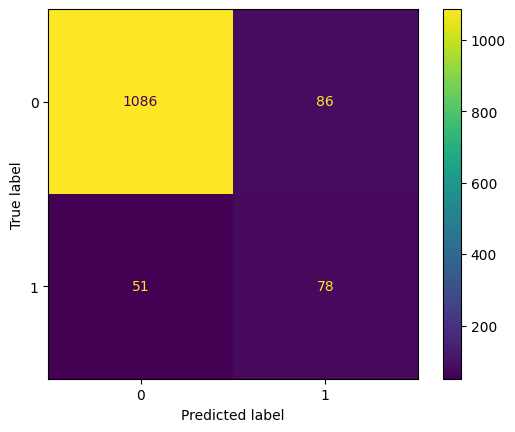

In [ ]:
name = 'LogisticRegression'
classifier2 = LogisticRegression(random_state=0,class_weight=cw)

#classifier2.fit(tfidf_train_vectors,df_ami_train['label'])
classifier2.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier2.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))
joblib.dump(classifier2, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/redditw_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

cm = confusion_matrix(df_reddit_test['label'],y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Investigating false positives

In [ ]:
df_reddit_test['predicted_label']=y_pred
df_reddit_test

,Unnamed: 0.1,Unnamed: 0,text,label,full_text,tokenized_text,clean_text,predicted_label
0,0,0,"['honestly', 'favorite', 'thing', 'feel', 'nee...",0,honestly my favorite thing about this is that ...,"['honestly', 'favorite', 'thing', 'feel', 'nee...",honestly favorite thing feel need cite beauty ...,0
1,1,1,"['source', 'not', 'sound', 'right', 'not', 'kn...",0,source does not sound right to me i do not know,"['source', 'not', 'sound', 'right', 'not', 'kn...",source not sound right not know,0
2,2,2,"['not', 'plot', 'cocoon']",0,is not this the plot of cocoon,"['not', 'plot', 'cocoon']",not plot cocoon,0
3,3,3,"['professionals', 'say', 'dehydration', 'cause...",0,professionals say that dehydration is caused b...,"['professionals', 'say', 'dehydration', 'cause...",professionals say dehydration caused not drink...,0
4,4,4,"['not', 'believe', 'not', 'virgina', 'spread',...",0,i cannot believe it is not virgina spread open,"['not', 'believe', 'not', 'virgina', 'spread',...",not believe not virgina spread open,0
...,...,...,...,...,...,...,...,...
1296,1296,1298,"['think', 'due', 'traditional', 'view', 'women...",0,i think that due to the traditional view that ...,"['think', 'due', 'traditional', 'view', 'women...",think due traditional view women caring nurtur...,0
1297,1297,1299,"['men', 'fuck', 'agreed', 'amusing', 'many', '...",1,but we as men fuck it up for them\nagreed it i...,"['men', 'fuck', 'agreed', 'amusing', 'many', '...",men fuck agreed amusing many men not ask prett...,1
1298,1298,1300,"['men', 'fuck', 'agreed', 'amusing', 'many', '...",1,but we as men fuck it up for them\nagreed it i...,"['men', 'fuck', 'agreed', 'amusing', 'many', '...",men fuck agreed amusing many men not ask prett...,1
1299,1299,1301,"['seems', 'like', 'taking', 'masculine', 'role...",1,it seems like you are taking on the masculine ...,"['seems', 'like', 'taking', 'masculine', 'role...",seems like taking masculine role since one sav...,1


In [ ]:
df_reddit_test[(df_reddit_test['label']==0) & (df_reddit_test['predicted_label']==1)]['full_text'][119]

'no true woman likes such sexist filth s'

In [ ]:
df_reddit_test[(df_reddit_test['label']==0) & (df_reddit_test['predicted_label']==1)]['full_text'][56]

'oh wow it just clicked that is why i have been getting all those looks from women this week'

In [ ]:
df_reddit_test[(df_reddit_test['label']==0) & (df_reddit_test['predicted_label']==1)]['full_text'][134]

'i started to read then saw how long this was seems like you need to stay off this forum and take some action in the real world go and talk to more girls stop it with this mental procrastination'

In [ ]:
df_reddit_test[(df_reddit_test['label']==0) & (df_reddit_test['predicted_label']==1)]['full_text'][95]

'but women do have male hormones just not as much as men\n\nso according to that logic all women can code'

In [ ]:
df_reddit_test[(df_reddit_test['label']==0) & (df_reddit_test['predicted_label']==1)]['full_text']

In [ ]:
df_reddit_test[(df_reddit_test['label']==0) & (df_reddit_test['predicted_label']==1)].iloc[3,:]

Unnamed: 0.1                                                 119
Unnamed: 0                                                   119
text               ['true', 'woman', 'likes', 'sexist', 'filth']
label                                                          0
full_text                no true woman likes such sexist filth s
tokenized_text     ['true', 'woman', 'likes', 'sexist', 'filth']
clean_text                         true woman likes sexist filth
predicted_label                                                1
Name: 119, dtype: object

In [ ]:
df_reddit_test[(df_reddit_test['label']==1) & (df_reddit_test['predicted_label']==0)]

,Unnamed: 0.1,Unnamed: 0,text,label,full_text,tokenized_text,clean_text,predicted_label
54,54,54,"['telling', 'hit', 'treadmill', 'better', 'own...",1,telling them to hit the treadmill is better\no...,"['telling', 'hit', 'treadmill', 'better', 'own...",telling hit treadmill better owned,0
55,55,55,"['funny', 'see', 'hamster', 'starts', 'act', '...",1,it is funny to see the hamster that starts to ...,"['funny', 'see', 'hamster', 'starts', 'act', '...",funny see hamster starts act little widdle tin...,0
58,58,58,"['fucking', 'materialistic', 'nature', 'hilari...",1,their fucking materialistic nature is so hilar...,"['fucking', 'materialistic', 'nature', 'hilari...",fucking materialistic nature hilarious valenti...,0
70,70,70,"['great', 'write', 'great', 'found', 'way', 'r...",1,great write up it is great that you have found...,"['great', 'write', 'great', 'found', 'way', 'r...",great write great found way rebound divorce ex...,0
82,82,82,"['moms', 'pussies', 'inexplicably', 'stretched...",1,no moms have their pussies inexplicably stretc...,"['moms', 'pussies', 'inexplicably', 'stretched...",moms pussies inexplicably stretched not want r...,0
99,99,99,"['honest', 'nice', 'playing', 'blue', 'pill', ...",1,to be honest its nice playing blue pill with t...,"['honest', 'nice', 'playing', 'blue', 'pill', ...",honest nice playing blue pill women sometimes ...,0
103,103,103,"['true', 'zero', 'long', 'range', 'thinking', ...",1,that is very true they have zero long range th...,"['true', 'zero', 'long', 'range', 'thinking', ...",true zero long range thinking many spend beyon...,0
105,105,105,"['not', 'strange', 'among', 'influx', 'feminis...",1,is it not strange that among the influx of fem...,"['not', 'strange', 'among', 'influx', 'feminis...",not strange among influx feminists simps comme...,0
122,122,122,"['want', 'equality', 'want', 'equal', 'men']",1,they do want equality they just want to be mor...,"['want', 'equality', 'want', 'equal', 'men']",want equality want equal men,0
135,135,135,"['cold', 'approach', 'hard', 'forget', 'people...",1,cold approach is very hard forget people judgi...,"['cold', 'approach', 'hard', 'forget', 'people...",cold approach hard forget people judging worry...,0


In [ ]:
name = 'SVC'
classifier3 = SVC(random_state=0,class_weight=cw)

#classifier3.fit(tfidf_train_vectors,df_ami_train['label'])
classifier3.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier3.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))
joblib.dump(classifier3, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/redditw_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1172
           1       0.79      0.20      0.32       129

    accuracy                           0.92      1301
   macro avg       0.85      0.60      0.64      1301
weighted avg       0.91      0.92      0.89      1301

Accuracy: 0.9154496541122213
Precision: 0.7878787878787878
Recall: 0.20155038759689922


In [ ]:
df_reddit_train_downsampled = pd.read_csv('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/reddit_data/train_downsampled_cleaned.csv')
#df_reddit_test = pd.read_csv('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/reddit_data/test_reddit.csv')

In [ ]:
tokens_to_text2=[]
for i,j in df_reddit_train_downsampled.iterrows():
  #f=json.loads(j['tokenised_text'])
  s = ' '.join(eval(j['tokenised_text']))
  tokens_to_text2.append(s)

df_reddit_train_downsampled['clean_text']=tokens_to_text2

In [ ]:
tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors_reddit_d = tfidf_vectorizer.fit_transform(df_reddit_train_downsampled['clean_text'])
tfidf_test_vectors_reddit = tfidf_vectorizer.transform(df_reddit_test['clean_text'])

In [ ]:
name = 'RandomForestClassifier'
classifier1 = RandomForestClassifier(random_state=0)

#classifier1.fit(tfidf_train_vectors,df_ami_train['label'])
classifier1.fit(tfidf_train_vectors_reddit_d,df_reddit_train_downsampled['label'])
y_pred = classifier1.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))

#joblib.dump(classifier1, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1172
           1       1.00      0.19      0.31       129

    accuracy                           0.92      1301
   macro avg       0.96      0.59      0.64      1301
weighted avg       0.93      0.92      0.89      1301

Accuracy: 0.9192928516525749
Precision: 1.0
Recall: 0.18604651162790697


In [ ]:
name = 'LogisticRegression'
classifier2 = LogisticRegression(random_state=0)

#classifier2.fit(tfidf_train_vectors,df_ami_train['label'])
classifier2.fit(tfidf_train_vectors_reddit_d,df_reddit_train_downsampled['label'])
#classifier2.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier2.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))
#joblib.dump(classifier2, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1172
           1       0.85      0.13      0.23       129

    accuracy                           0.91      1301
   macro avg       0.88      0.56      0.59      1301
weighted avg       0.91      0.91      0.88      1301

Accuracy: 0.9116064565718678
Precision: 0.85
Recall: 0.13178294573643412


In [ ]:
name = 'SVC'
classifier3 = SVC(random_state=0)

#classifier3.fit(tfidf_train_vectors,df_ami_train['label'])
#classifier3.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
classifier3.fit(tfidf_train_vectors_reddit_d,df_reddit_train_downsampled['label'])
y_pred = classifier3.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))
#joblib.dump(classifier3, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1172
           1       1.00      0.06      0.12       129

    accuracy                           0.91      1301
   macro avg       0.95      0.53      0.53      1301
weighted avg       0.92      0.91      0.87      1301

Accuracy: 0.9069946195234435
Precision: 1.0
Recall: 0.06201550387596899


In [ ]:
df_reddit_train_upsampled = pd.read_csv('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/reddit_data/train_upsampled_cleaned.csv')
#df_reddit_test = pd.read_csv('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/reddit_data/test_reddit.csv')

In [ ]:
tokens_to_text2=[]
for i,j in df_reddit_train_upsampled.iterrows():
  #f=json.loads(j['tokenised_text'])
  s = ' '.join(eval(j['tokenised_text']))
  tokens_to_text2.append(s)

df_reddit_train_upsampled['clean_text']=tokens_to_text2

In [ ]:
tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors_reddit_u = tfidf_vectorizer.fit_transform(df_reddit_train_upsampled['clean_text'])
tfidf_test_vectors_reddit = tfidf_vectorizer.transform(df_reddit_test['clean_text'])

In [ ]:
name = 'RandomForestClassifier'
classifier1 = RandomForestClassifier(random_state=0)

#classifier1.fit(tfidf_train_vectors,df_ami_train['label'])
classifier1.fit(tfidf_train_vectors_reddit_u,df_reddit_train_upsampled['label'])
y_pred = classifier1.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))

#joblib.dump(classifier1, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1172
           1       0.80      0.09      0.17       129

    accuracy                           0.91      1301
   macro avg       0.85      0.55      0.56      1301
weighted avg       0.90      0.91      0.87      1301

Accuracy: 0.9077632590315142
Precision: 0.8
Recall: 0.09302325581395349


In [ ]:
name = 'LogisticRegression'
classifier2 = LogisticRegression(random_state=0)

#classifier2.fit(tfidf_train_vectors,df_ami_train['label'])
classifier2.fit(tfidf_train_vectors_reddit_u,df_reddit_train_upsampled['label'])
#classifier2.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
y_pred = classifier2.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))
#joblib.dump(classifier2, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1172
           1       0.50      0.53      0.51       129

    accuracy                           0.90      1301
   macro avg       0.72      0.74      0.73      1301
weighted avg       0.90      0.90      0.90      1301

Accuracy: 0.9000768639508071
Precision: 0.49640287769784175
Recall: 0.5348837209302325


In [ ]:
name = 'SVC'
classifier3 = SVC(random_state=0)

#classifier3.fit(tfidf_train_vectors,df_ami_train['label'])
#classifier3.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
classifier3.fit(tfidf_train_vectors_reddit_u,df_reddit_train_upsampled['label'])
y_pred = classifier3.predict(tfidf_test_vectors_reddit)
print(classification_report(df_reddit_test['label'],y_pred))
#joblib.dump(classifier3, '/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/reddit_tfidf_{0}_best_model.pkl'.format(name))

accuracy = accuracy_score(df_reddit_test['label'],y_pred)
precision = precision_score(df_reddit_test['label'],y_pred)
recall = recall_score(df_reddit_test['label'],y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1172
           1       0.78      0.14      0.24       129

    accuracy                           0.91      1301
   macro avg       0.85      0.57      0.59      1301
weighted avg       0.90      0.91      0.88      1301

Accuracy: 0.9108378170637971
Precision: 0.782608695652174
Recall: 0.13953488372093023


### Blending

In [ ]:
df_probas = pd.DataFrame(columns = ['AMI_SVC_0','AMI_LR_0','AMI_RF_0','RED_SVC_0','RED_LR_0','RED_RF_0',
                                    'AMI_SVC_1','AMI_LR_1','AMI_RF_1','RED_SVC_1','RED_LR_1','RED_RF_1'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(df_ami_train['clean_text'])

tfidf_test_vectors = tfidf_vectorizer.transform(df_ami_test['clean_text'])

In [ ]:

#tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors_reddit = tfidf_vectorizer.transform(df_reddit_train['clean_text'])

tfidf_test_vectors_reddit = tfidf_vectorizer.transform(df_reddit_test['clean_text'])

In [ ]:
name='RandomForestClassifier'
ami_rf = joblib.load('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/ami_tfidf_{0}_best_model.pkl'.format(name))
ami_rf.fit(tfidf_train_vectors,df_ami_train['label'])
preds_ami_rf = ami_rf.predict(tfidf_test_vectors_reddit)
preds_proba_ami_rf = ami_rf.predict_proba(tfidf_test_vectors_reddit)
preds_proba_ami_rf


name='LogisticRegression'
ami_lr = joblib.load('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/ami_tfidf_{0}_best_model.pkl'.format(name))
ami_lr.fit(tfidf_train_vectors,df_ami_train['label'])
preds_ami_lr  = ami_lr.predict(tfidf_test_vectors_reddit)
preds_proba_ami_lr = ami_lr.predict_proba(tfidf_test_vectors_reddit)
preds_proba_ami_lr

name='SVC'
#ami_sv = joblib.load('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/ami_tfidf_{0}_best_model.pkl'.format(name))
ami_sv = SVC(random_state=0,probability=True)
ami_sv.fit(tfidf_train_vectors,df_ami_train['label'])
preds_ami_sv  = ami_sv.predict(tfidf_test_vectors_reddit)
preds_proba_ami_sv = ami_sv.predict_proba(tfidf_test_vectors_reddit)
preds_proba_ami_sv

array([[0.84811186, 0.15188814],
       [0.85327278, 0.14672722],
       [0.85864033, 0.14135967],
       ...,
       [0.35546369, 0.64453631],
       [0.73366986, 0.26633014],
       [0.48532701, 0.51467299]])

In [ ]:
df_probas['AMI_SVC_0']=preds_proba_ami_sv[:,0]
df_probas['AMI_SVC_1']=preds_proba_ami_sv[:,1]

df_probas['AMI_LR_0']=preds_proba_ami_lr[:,0]
df_probas['AMI_LR_1']=preds_proba_ami_lr[:,1]

df_probas['AMI_RF_0']=preds_proba_ami_rf[:,0]
df_probas['AMI_RF_1']=preds_proba_ami_rf[:,1]

In [ ]:
tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors_reddit = tfidf_vectorizer.fit_transform(df_reddit_train['clean_text'])
tfidf_test_vectors_reddit = tfidf_vectorizer.transform(df_reddit_test['clean_text'])

In [ ]:
#weighted reddit
name='SVC'
#red_sv = joblib.load('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/redditw_tfidf_{0}_best_model.pkl'.format(name))
red_sv = SVC(random_state=0,probability=True,class_weight=cw)
red_sv.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
preds_red_sv  = red_sv.predict(tfidf_test_vectors_reddit)
preds_proba_red_sv = red_sv.predict_proba(tfidf_test_vectors_reddit)
preds_proba_red_sv


name='LogisticRegression'
red_lr = joblib.load('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/redditw_tfidf_{0}_best_model.pkl'.format(name))
red_lr.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
preds_red_lr  = red_lr.predict(tfidf_test_vectors_reddit)
preds_proba_red_lr = red_lr.predict_proba(tfidf_test_vectors_reddit)
preds_proba_red_lr

name='RandomForestClassifier'
red_rf = joblib.load('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/redditw_tfidf_{0}_best_model.pkl'.format(name))
red_rf.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
preds_red_rf = red_rf.predict(tfidf_test_vectors_reddit)
preds_proba_red_rf = red_rf.predict_proba(tfidf_test_vectors_reddit)
preds_proba_red_rf

array([[0.98      , 0.02      ],
       [0.99      , 0.01      ],
       [1.        , 0.        ],
       ...,
       [0.81108489, 0.18891511],
       [0.83      , 0.17      ],
       [0.81      , 0.19      ]])

In [ ]:
df_probas['RED_SVC_0']=preds_proba_red_sv[:,0]
df_probas['RED_SVC_1']=preds_proba_red_sv[:,1]

df_probas['RED_LR_0']=preds_proba_red_lr[:,0]
df_probas['RED_LR_1']=preds_proba_red_lr[:,1]

df_probas['RED_RF_0']=preds_proba_red_rf[:,0]
df_probas['RED_RF_1']=preds_proba_red_rf[:,1]

In [ ]:
df_probas

,AMI_SVC_0,AMI_LR_0,AMI_RF_0,RED_SVC_0,RED_LR_0,RED_RF_0,AMI_SVC_1,AMI_LR_1,AMI_RF_1,RED_SVC_1,RED_LR_1,RED_RF_1
0,0.848112,0.766457,0.86,0.973843,0.822680,0.980000,0.151888,0.233543,0.14,0.026157,0.177320,0.020000
1,0.853273,0.776359,0.84,0.984928,0.849827,0.990000,0.146727,0.223641,0.16,0.015072,0.150173,0.010000
2,0.858640,0.795219,0.95,0.962352,0.801433,1.000000,0.141360,0.204781,0.05,0.037648,0.198567,0.000000
3,0.733651,0.708734,0.85,0.953856,0.802077,0.950000,0.266349,0.291266,0.15,0.046144,0.197923,0.050000
4,0.694768,0.696177,0.75,0.977029,0.833593,1.000000,0.305232,0.303823,0.25,0.022971,0.166407,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0.536340,0.532023,0.69,0.892134,0.661345,0.840000,0.463660,0.467977,0.31,0.107866,0.338655,0.160000
1297,0.355464,0.482276,0.32,0.209759,0.102655,0.811085,0.644536,0.517724,0.68,0.790241,0.897345,0.188915
1298,0.355464,0.482276,0.32,0.209759,0.102655,0.811085,0.644536,0.517724,0.68,0.790241,0.897345,0.188915
1299,0.733670,0.700735,0.85,0.888649,0.413287,0.830000,0.266330,0.299265,0.15,0.111351,0.586713,0.170000


In [ ]:
df_probas['class0_total_probas'] = df_probas.iloc[:,0:6].sum(axis = 1)/6
df_probas['class1_total_probas'] = df_probas.iloc[:,6:12].sum(axis = 1)/6

In [ ]:
df_probas['True_label']=df_reddit_test['label']

In [ ]:
pred_labels=[]
for i,j in df_probas.iterrows():
  if j['class0_total_probas']>j['class1_total_probas']:
    pred_labels.append(0)
  else:
    pred_labels.append(1)

In [ ]:
df_probas['predicted_label']=pred_labels

In [ ]:
df_probas

,AMI_SVC_0,AMI_LR_0,AMI_RF_0,RED_SVC_0,RED_LR_0,RED_RF_0,AMI_SVC_1,AMI_LR_1,AMI_RF_1,RED_SVC_1,RED_LR_1,RED_RF_1,class0_total_probas,class1_total_probas,True_label,predicted_label
0,0.848112,0.766457,0.86,0.973843,0.822680,0.980000,0.151888,0.233543,0.14,0.026157,0.177320,0.020000,0.875182,0.124818,0,0
1,0.853273,0.776359,0.84,0.984928,0.849827,0.990000,0.146727,0.223641,0.16,0.015072,0.150173,0.010000,0.882398,0.117602,0,0
2,0.858640,0.795219,0.95,0.962352,0.801433,1.000000,0.141360,0.204781,0.05,0.037648,0.198567,0.000000,0.894607,0.105393,0,0
3,0.733651,0.708734,0.85,0.953856,0.802077,0.950000,0.266349,0.291266,0.15,0.046144,0.197923,0.050000,0.833053,0.166947,0,0
4,0.694768,0.696177,0.75,0.977029,0.833593,1.000000,0.305232,0.303823,0.25,0.022971,0.166407,0.000000,0.825261,0.174739,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0.536340,0.532023,0.69,0.892134,0.661345,0.840000,0.463660,0.467977,0.31,0.107866,0.338655,0.160000,0.691974,0.308026,0,0
1297,0.355464,0.482276,0.32,0.209759,0.102655,0.811085,0.644536,0.517724,0.68,0.790241,0.897345,0.188915,0.380206,0.619794,1,1
1298,0.355464,0.482276,0.32,0.209759,0.102655,0.811085,0.644536,0.517724,0.68,0.790241,0.897345,0.188915,0.380206,0.619794,1,1
1299,0.733670,0.700735,0.85,0.888649,0.413287,0.830000,0.266330,0.299265,0.15,0.111351,0.586713,0.170000,0.736057,0.263943,1,0


In [ ]:
df_probas.describe()

,AMI_SVC_0,AMI_LR_0,AMI_RF_0,RED_SVC_0,RED_LR_0,RED_RF_0,AMI_SVC_1,AMI_LR_1,AMI_RF_1,RED_SVC_1,RED_LR_1,RED_RF_1,class0_total_probas,class1_total_probas,True_label,predicted_label
count,1.301000e+03,1301.000000,1301.000000,1.301000e+03,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000
mean,7.477884e-01,0.701470,0.781102,9.086412e-01,0.722149,0.927428,0.252212,0.298530,0.218898,0.091359,0.277851,0.072572,0.798096,0.201904,0.099154,0.029977
std,1.531130e-01,0.108591,0.170915,1.542039e-01,0.190787,0.097913,0.153113,0.108591,0.170915,0.154204,0.190787,0.097913,0.120721,0.120721,0.298984,0.170589
min,2.913095e-13,0.000317,0.090000,4.094372e-10,0.002822,0.000000,0.000907,0.016304,0.000000,0.002724,0.029256,0.000000,0.067190,0.054313,0.000000,0.000000
25%,6.875924e-01,0.653382,0.690000,9.212258e-01,0.651680,0.900000,0.148622,0.231458,0.090000,0.023992,0.147626,0.010000,0.758736,0.120737,0.000000,0.000000
50%,7.896351e-01,0.724026,0.820000,9.613644e-01,0.785242,0.960000,0.210365,0.275974,0.180000,0.038636,0.214758,0.040000,0.831435,0.168565,0.000000,0.000000
75%,8.513778e-01,0.768542,0.910000,9.760079e-01,0.852374,0.990000,0.312408,0.346618,0.310000,0.078774,0.348320,0.100000,0.879263,0.241264,0.000000,0.000000
max,9.990931e-01,0.983696,1.000000,9.972764e-01,0.970744,1.000000,1.000000,0.999683,0.910000,1.000000,0.997178,1.000000,0.945687,0.932810,1.000000,1.000000


In [ ]:
accuracy = accuracy_score(df_probas['True_label'],df_probas['predicted_label'])
precision = precision_score(df_probas['True_label'],df_probas['predicted_label'])
recall = recall_score(df_probas['True_label'],df_probas['predicted_label'])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9169869331283628
Precision: 0.7692307692307693
Recall: 0.23255813953488372


Classification Report:


              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1172
           1       0.77      0.23      0.36       129

    accuracy                           0.92      1301
   macro avg       0.85      0.61      0.66      1301
weighted avg       0.91      0.92      0.90      1301



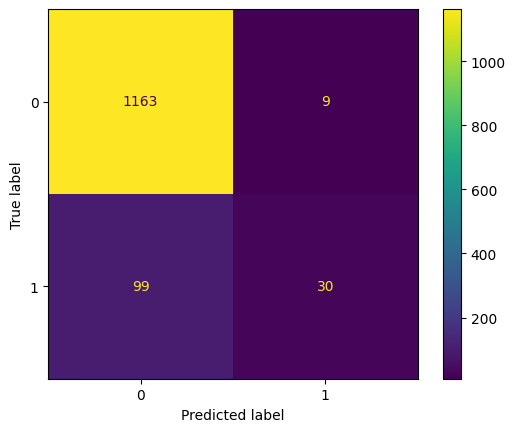

In [ ]:
cm = confusion_matrix(df_probas['True_label'],df_probas['predicted_label'])
ConfusionMatrixDisplay(confusion_matrix=cm).plot();
print('Classification Report:')
print('\n')
print(classification_report(df_probas['True_label'],df_probas['predicted_label']))

In [ ]:
#0.3570

### Testing best model on Transcripts

In [ ]:
import pandas as pd
df_eval = pd.read_csv('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/eval_videos_cleaned.csv')
df_eval

,Unnamed: 0,tokenised_text,label,text
0,0,"['moved', 'failed', 'admit', 'try', 'married',...",1,moved on her and i failed i will admit i did t...
1,1,"['not', 'think', 'world', 'ever', 'equal', 'no...",1,i do not think the world has ever been equal i...
2,2,"['full', 'love', 'love', 'women', 'absolutely'...",1,i am full of love i love women now i am absolu...
3,3,"['right', 'also', 'known', 'said', 'appears', ...",1,all right you are also known you said it appea...
4,4,"['todays', 'society', 'modern', 'women', 'impo...",1,in todays society with modern women the most i...
5,5,"['tell', 'not', 'done', 'anything', 'wrong', '...",0,you can tell he has not done anything wrong ju...
6,6,"['day', 'actually', 'first', 'day', 'covid', '...",0,because on the day i actually it was my first ...
7,7,"['right', 'hooper', 'would', 'rather', 'would'...",0,all right hooper would you rather would you ra...
8,8,"['want', 'know', 'eat', 'cupcake', 'hear', 'ea...",0,i want to know how you eat a cupcake because i...
9,9,"['willing', 'trade', 'app', 'mystery', 'outfit...",0,are you willing to trade the app that you have...


In [ ]:
tokens_to_text2=[]
for i,j in df_eval.iterrows():
  #f=json.loads(j['tokenised_text'])
  s = ' '.join(eval(j['tokenised_text']))
  tokens_to_text2.append(s)

df_eval['clean_text']=tokens_to_text2

In [ ]:
tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors_reddit = tfidf_vectorizer.fit_transform(df_reddit_train['clean_text'])
tfidf_test_vectors_eval = tfidf_vectorizer.transform(df_eval['clean_text'])

In [ ]:
name='LogisticRegression'
eval_lr = joblib.load('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/redditw_tfidf_{0}_best_model.pkl'.format(name))
eval_lr.fit(tfidf_train_vectors_reddit,df_reddit_train['label'])
preds_eval_lr  = eval_lr.predict(tfidf_test_vectors_eval)

In [ ]:
preds_eval_lr

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(df_eval['label'],preds_eval_lr)
precision = precision_score(df_eval['label'],preds_eval_lr)
recall = recall_score(df_eval['label'],preds_eval_lr)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8
Precision: 1.0
Recall: 0.6


Classification Report:


              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



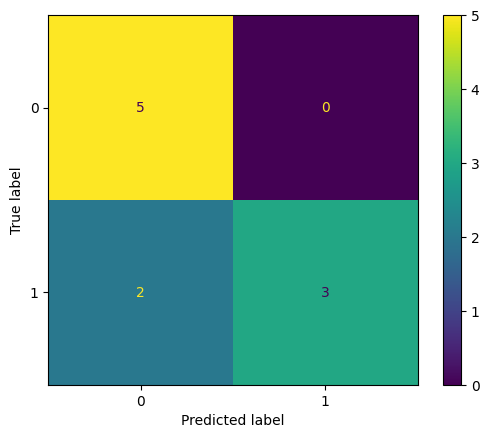

In [ ]:
cm = confusion_matrix(df_eval['label'],preds_eval_lr)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();
print('Classification Report:')
print('\n')
print(classification_report(df_eval['label'],preds_eval_lr))